In [57]:
#import required libraries 
#import OpenCV library
import cv2
import matplotlib.pyplot as plt
import time 
%matplotlib inline
import os
path = os.path.dirname(cv2.__file__)

In [58]:
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [59]:
#load test iamge
#test1 = cv2.imread('data/test1.jpg')
test1 = cv2.imread('./dataset/img3.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

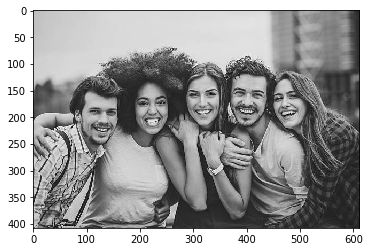

In [6]:
plt.imshow(gray_img, cmap='gray')

In [7]:
haar_face_cascade = cv2.CascadeClassifier('./lbpcascade_frontalface.xml')
#haar_face_cascade = cv2.CascadeClassifier('/home/desktop-ml-05/miniconda2/envs/python3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_alt.xml')
#haar_face_cascade = cv2.CascadeClassifier(path+'/data/lbpcascade_frontalface.xml')

In [8]:
faces = haar_face_cascade.detectMultiScale(gray_img,1.1, 5);

In [10]:
print('Faces found: ', len(faces))

Faces found:  0


In [11]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

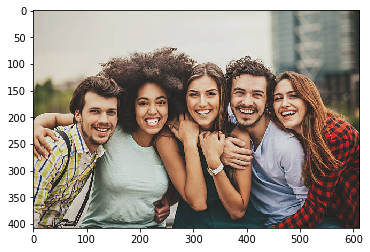

In [12]:
plt.imshow(convertToRGB(test1))

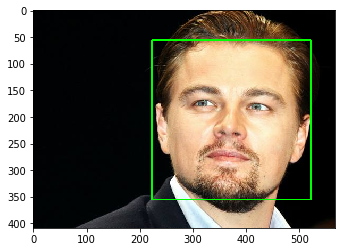

In [61]:
lbp_face_cascade = cv2.CascadeClassifier('./lbpcascade_frontalface.xml')
#lbp_face_cascade = cv2.CascadeClassifier('./lbpcascade_frontalface.xml')
#load another image
test2 = cv2.imread('./dataset/img1.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

In [60]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.2):
    #just making a copy of image passed, so that passed image is not changed
    #img_copy = colored_img.copy()          
    img_copy = colored_img
    

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy

In [62]:
fr = detect(gray_img,test1)

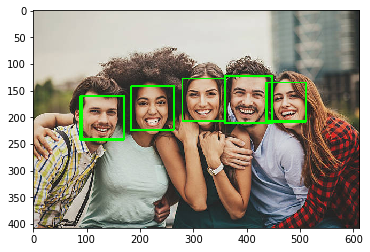

In [63]:
plt.imshow(convertToRGB(fr))

In [64]:

#importing libraries#import 
import cv2
#loading the cascades
face_cascades=cv2.CascadeClassifier('./text.xml')
#Detection
def detect(grey,frame):
    face=face_cascades.detectMultiScale(grey,1.3,5)
    for (x,y,w,h) in face:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    return frame


In [65]:
video_capture=cv2.VideoCapture(0)
while True:
    _, frame=video_capture.read()
    grey=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas=detect(grey,frame)
    cv2.imshow("Detected",canvas)
    if cv2.waitKey(1) & 0XFF ==ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()